In [7]:
import pickle
import pandas as pd

In [2]:
# Cargar las variables desde el archivo pickle
with open('datos_resultados/resultados_metrica_completa/recon_mlem_crit8.pickle', 'rb') as file:
    reconstruccion = pickle.load(file)


In [5]:
datos_objetivo = reconstruccion[-1]

# save with pickle datos_objetivo
with open('datos_resultados/resultados_metrica_completa/datos_objetivo.pickle', 'wb') as file:
    pickle.dump(datos_objetivo, file)

In [4]:
from matplotlib.pyplot import (
    matshow,
    colorbar,
    xlabel,
    ylabel,
    plot,
    legend,
    grid,
)

def recortar(x):
    return x[100:-120, 110:-110]

def recorta2(x):
    return x[15:,95:-110]

def recorta3(x):
    return x[25:,120:-120]


In [8]:
import matplotlib.pyplot as plt

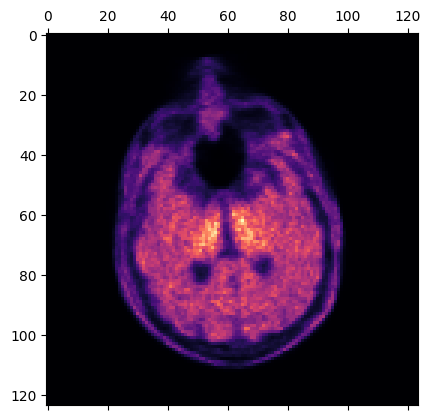

In [6]:
matshow(recortar(reconstruccion[-1][75,:,:]), cmap='magma')
plt.savefig('matshow_figure.png')

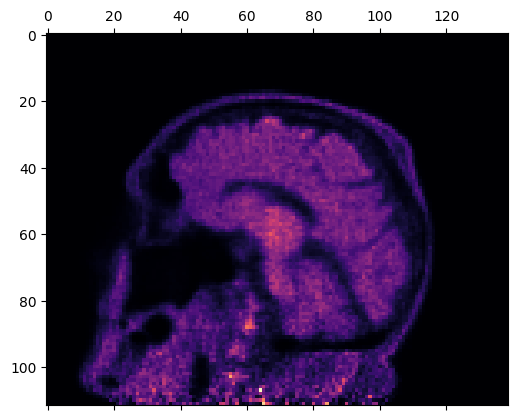

In [7]:
matshow(recorta2(reconstruccion[-1][:,:,175]), cmap='magma')

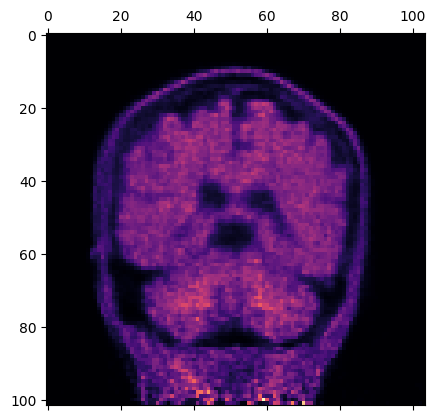

In [8]:
matshow(recorta3(reconstruccion[-1][:,175,:]), cmap='magma')

In [9]:
ruta = 'datos_resultados/reconstruccion_mlem/'

In [ ]:
listado_guardar = range(len(reconstruccion))

for i in listado_guardar:
    matshow(recortar(reconstruccion[i][75,:,:]), cmap='magma')
    plt.axis('off')
    plt.savefig(f'{ruta}mlem_{i}_transversal.png')

    matshow(recorta3(reconstruccion[i][:,175,:]), cmap='magma')
    plt.axis('off')
    plt.savefig(f'{ruta}mlem_{i}_sagital.png')

    matshow(recorta2(reconstruccion[i][:,:,175]), cmap='magma')
    plt.axis('off')
    plt.savefig(f'{ruta}mlem_{i}_coronal.png')

In [13]:
len(reconstruccion)

136

## Datos de las iteraciones

In [9]:
# Cargar las variables desde el archivo pickle
with open('datos_resultados/resultados_metrica_completa/datos_iteraciones_crit8.pickle', 'rb') as file:
    datos_iteraciones = pickle.load(file)


In [18]:
datos_iteraciones

[{'iteracion': -1, 'tiempo_iteracion': 0, 'MSE': 0, 'PSNR': 0, 'SSIM': 0},
 {'MSE': 0.031701981200337515,
  'PSNR': 18.671384414655858,
  'SSIM': 0.34731505554490844,
  'iteracion': 1,
  'tiempo_iteracion': 5.234763860702515},
 {'MSE': 0.004093062674709653,
  'PSNR': 24.55531695741195,
  'SSIM': 0.6835961540883421,
  'iteracion': 2,
  'tiempo_iteracion': 5.210543870925903},
 {'MSE': 0.0004224190013799101,
  'PSNR': 35.99351562940124,
  'SSIM': 0.8511123186527754,
  'iteracion': 3,
  'tiempo_iteracion': 5.15910267829895},
 {'MSE': 8.12151072809157e-05,
  'PSNR': 44.66514309066317,
  'SSIM': 0.9537477279423952,
  'iteracion': 4,
  'tiempo_iteracion': 5.179497003555298},
 {'MSE': 3.1758697949107495e-05,
  'PSNR': 50.982144059398244,
  'SSIM': 0.9869008416429774,
  'iteracion': 5,
  'tiempo_iteracion': 5.178680896759033},
 {'MSE': 2.9469071661247434e-05,
  'PSNR': 54.4666871366042,
  'SSIM': 0.9950760375503375,
  'iteracion': 6,
  'tiempo_iteracion': 5.212581634521484},
 {'MSE': 9.39813140

In [20]:
datos_iteraciones_mult10 = [x for x in datos_iteraciones if x['iteracion']%10==0]

In [22]:
datos_iteraciones = datos_iteraciones_mult10.copy()

In [23]:
df_datos_iteraciones = pd.DataFrame(datos_iteraciones)

In [24]:
df_datos_iteraciones['tiempo_acumulado'] = df_datos_iteraciones['tiempo_iteracion'].cumsum()

In [25]:
df_datos_iteraciones.head()

,MSE,PSNR,SSIM,iteracion,tiempo_iteracion,tiempo_acumulado
0,2.234164e-05,62.606356,0.999465,10,5.196964,5.196964
1,1.546141e-06,77.409999,0.999966,20,5.195831,10.392794
2,2.541861e-07,86.100610,0.999992,30,5.241596,15.634390
3,1.016363e-07,91.048503,0.999996,40,5.225394,20.859784
4,2.813714e-07,90.444005,0.999993,50,5.248976,26.108759


In [26]:
df_datos_iteraciones['tiempo_iteracion'].mean()

5.251334850604717

In [27]:
df_datos_iteraciones.to_csv('datos_resultados/resultados_metrica_completa/datos_iteraciones.csv', index=False)

In [30]:
columnas = df_datos_iteraciones.columns
columnas = list(columnas.drop(['MSE']))

In [33]:
columnas

['PSNR', 'SSIM', 'iteracion', 'tiempo_iteracion', 'tiempo_acumulado']

In [36]:
df_datos_iteraciones = df_datos_iteraciones[['iteracion','PSNR', 'SSIM', 'tiempo_iteracion', 'tiempo_acumulado']]

In [37]:
print(df_datos_iteraciones.to_latex(columns=['iteracion','PSNR', 'SSIM', 'tiempo_iteracion', 'tiempo_acumulado'],float_format="%.5f",index=False))

\begin{tabular}{rrrrr}
\toprule
iteracion & PSNR & SSIM & tiempo_iteracion & tiempo_acumulado \\
\midrule
10 & 62.60636 & 0.99947 & 5.19696 & 5.19696 \\
20 & 77.41000 & 0.99997 & 5.19583 & 10.39279 \\
30 & 86.10061 & 0.99999 & 5.24160 & 15.63439 \\
40 & 91.04850 & 1.00000 & 5.22539 & 20.85978 \\
50 & 90.44401 & 0.99999 & 5.24898 & 26.10876 \\
60 & 93.82645 & 1.00000 & 5.25846 & 31.36722 \\
70 & 96.21353 & 1.00000 & 5.28616 & 36.65338 \\
80 & 97.92031 & 1.00000 & 5.27891 & 41.93230 \\
90 & 99.24101 & 1.00000 & 5.25745 & 47.18975 \\
100 & 100.35452 & 1.00000 & 5.26300 & 52.45276 \\
110 & 101.33749 & 1.00000 & 5.29151 & 57.74427 \\
120 & 102.20375 & 1.00000 & 5.25590 & 63.00017 \\
130 & 102.93426 & 1.00000 & 5.26718 & 68.26735 \\
\bottomrule
\end{tabular}

